# When Can Collaborative Filtering Be Used? 

Collaborative filtering works around the **interactions** that users have with items. 

These **interactions** can help find patterns that the data about the items or users itself can’t. 

- Collaborative filtering doesn’t require features about the items or users to be known. It is suited for a set of different types of items, for example, a supermarket’s inventory where items of various categories can be added. In a set of similar items such as that of a bookstore, though, known features like writers and genres can be useful and might benefit from content-based or hybrid approaches.

-  it’s usually a hybrid recommender that comes to the rescue.

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d

https://realpython.com/build-recommendation-engine-collaborative-filtering/#memory-based

In [2]:
df = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id','item_id','rating','titmestamp'])

In [3]:
df.head()

,user_id,item_id,rating,titmestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


It would be nice if we can see the titles of the movie instead of just dealing with the IDs. Let’s load in the movie titles and merge it with this dataset.

We group the dataset by the title column and compute its mean to obtain the average rating for each movie.

In [6]:
df.columns

Index(['user_id', 'item_id', 'rating', 'titmestamp'], dtype='object')

In [7]:
ratings = pd.DataFrame(df.groupby('item_id')['rating'].mean())
ratings.head()

,rating
item_id,
1,3.878319
2,3.206107
3,3.033333
4,3.550239
5,3.302326


In [9]:
ratings['number_of_ratings'] = df.groupby('item_id')['rating'].count()
ratings.head()

,rating,number_of_ratings
item_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


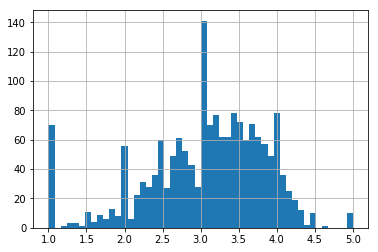

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

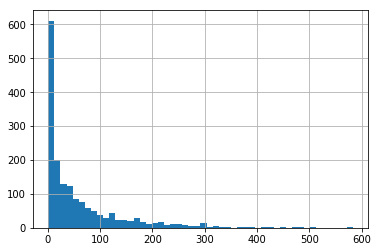

In [13]:
ratings['number_of_ratings'].hist(bins=50)

Let’s now check the relationship between the rating of a movie and the number of ratings. We do this by plotting a scatter plot using seaborn. Seaborn enables us to do this using the jointplot() function.

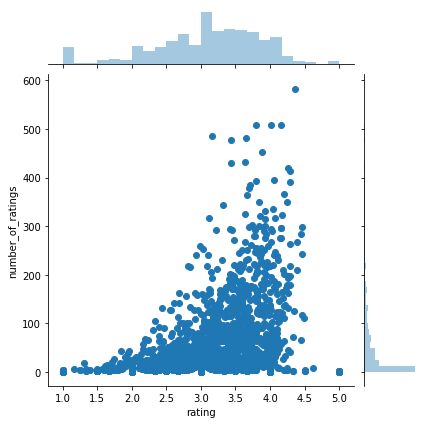

In [14]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

Let’s now move on swiftly and create a simple item based recommender system. In order to do this we need to convert our dataset into a matrix with the movie titles as the columns, the **user_id** as the index and the ratings as the values. By doing this we shall get a dataframe with the columns as the movie titles and the rows as the user ids. Each column represents all the ratings of a movie by all users. The rating appear as NAN where a user didn't rate a certain movie. We shall use this matrix to compute the correlation between the ratings of a single movie and the rest of the movies in the matrix. We use pandas **pivot_table** utility to create the movie matrix.

In [15]:
movie_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating')
movie_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next let’s look at the most rated movies and choose two of them to work with in this simple recommender system. We use pandas **sort_values** utility and set **ascending** to false in order to arrange the movies from the most rated. We then use the head() function to view the top 10.

In [16]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
item_id,,
50,4.358491,583
258,3.803536,509
100,4.155512,508
181,4.007890,507
294,3.156701,485
286,3.656965,481
288,3.441423,478
1,3.878319,452
300,3.631090,431


## Surprise library

```
$ pip install numpy
$ pip install scikit-surprise
```

In [17]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data = Dataset.load_builtin("ml-100k")

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /home/paul/.surprise_data/ml-100k


In [20]:
data

In [21]:
param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.9635407472079963
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [22]:
# Test loading from df

In [27]:
from surprise import Reader
df2 = df[['user_id','item_id','rating']]
reader = Reader(rating_scale=(1, 5))
data2 = Dataset.load_from_df(df2,reader)

In [28]:
gs.fit(data2)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.9639312345504002
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


## LightFM library

```pip install lightfm```

In [29]:
from lightfm import LightFM
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import precision_at_k

# Load the MovieLens 100k dataset. Only five
# star ratings are treated as positive.
data = fetch_movielens(min_rating=5.0)

# Instantiate and train the model
model = LightFM(loss='warp')
model.fit(data['train'], epochs=30, num_threads=2)

# Evaluate the trained model
test_precision = precision_at_k(model, data['test'], k=5).mean()

In [30]:
test_precision

0.05257596

In [31]:
data

{'train': <943x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 19048 stored elements in COOrdinate format>,
 'test': <943x1682 sparse matrix of type '<class 'numpy.int32'>'
 	with 2153 stored elements in COOrdinate format>,
 'item_features': <1682x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 1682 stored elements in Compressed Sparse Row format>,
 'item_feature_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object),
 'item_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object)}

### Mine

In [40]:
from lightfm.data import Dataset

dataset = Dataset()
dataset.fit((x for x in df2['user_id']),(x for x in df2['item_id']))

In [41]:
num_users, num_items = dataset.interactions_shape()
print("Num user: {}, num_itmes {}.".format(num_users, num_items))

Num user: 943, num_itmes 1682.


In [48]:
dataset2 = Dataset()
dataset2.fit((x['user_id'] for i, x in df2.iterrows() if x['rating'] == 5),(x['item_id'] for i, x in df2.iterrows() if x['rating'] == 5))

In [49]:
num_users, num_items = dataset2.interactions_shape()
print("Num user: {}, num_itmes {}.".format(num_users, num_items))

Num user: 928, num_itmes 1172.


In [135]:
from scipy import sparse

# ------------------------------------------
def create_interaction_matrix(df,user_col, item_col, rating_col, norm= False, threshold = None):
    '''
    Function to create an interaction matrix dataframe from transactional type interactions
    Required Input -
        - df = Pandas DataFrame containing user-item interactions
        - user_col = column name containing user's identifier
        - item_col = column name containing item's identifier
        - rating col = column name containing user feedback on interaction with a given item
        - norm (optional) = True if a normalization of ratings is needed
        - threshold (required if norm = True) = value above which the rating is favorable
    Expected output - 
        - Pandas dataframe with user-item interactions ready to be fed in a recommendation algorithm
    '''
    interactions = df.groupby([user_col, item_col])[rating_col] \
            .sum().unstack().reset_index(). \
            fillna(0).set_index(user_col)
    if norm:
        interactions = interactions.applymap(lambda x: 1 if x > threshold else 0)
    return interactions

def create_user_dict(interactions):
    '''
    Function to create a user dictionary based on their index and number in interaction dataset
    Required Input - 
        interactions - dataset create by create_interaction_matrix
    Expected Output -
        user_dict - Dictionary type output containing interaction_index as key and user_id as value
    '''
    user_id = list(interactions.index)
    user_dict = {}
    counter = 0 
    for i in user_id:
        user_dict[i] = counter
        counter += 1
    return user_dict

def create_item_dict(df,id_col,name_col):
    '''
    Function to create an item dictionary based on their item_id and item name
    Required Input - 
        - df = Pandas dataframe with Item information
        - id_col = Column name containing unique identifier for an item
        - name_col = Column name containing name of the item
    Expected Output -
        item_dict = Dictionary type output containing item_id as key and item_name as value
    '''
    item_dict ={}
    for i in range(df.shape[0]):
        item_dict[(df.loc[i,id_col])] = df.loc[i,name_col]
    return item_dict



def runMF(interactions, n_components=30, loss='warp', k=15, epoch=30,n_jobs = 4):
    '''
    Function to run matrix-factorization algorithm
    Required Input -
        - interactions = dataset create by create_interaction_matrix
        - n_components = number of embeddings you want to create to define Item and user
        - loss = loss function other options are logistic, brp
        - epoch = number of epochs to run 
        - n_jobs = number of cores used for execution 
    Expected Output  -
        Model - Trained model
    '''
    x = sparse.csr_matrix(interactions.values)
    model = LightFM(no_components= n_components, loss=loss,k=k)
    model.fit(x,epochs=epoch,num_threads = n_jobs)
    return model




In [122]:
items = df2.copy()
items['title'] = 'T' + items['item_id'].astype(str)
items = items[['item_id','title']].copy()

In [123]:
items.head()

,item_id,title
0,242,T242
1,302,T302
2,377,T377
3,51,T51
4,346,T346


In [125]:
# Creating interaction matrix using rating data
interactions = create_interaction_matrix(df = df,
                                         user_col = 'user_id',
                                         item_col = 'item_id',
                                         rating_col = 'rating')
interactions.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
# create user dict
user_dict = create_user_dict(interactions=interactions)
# create item dict
item_dict = create_item_dict(df=items,id_col='item_id',name_col='title')

In [136]:
mf_model = runMF(interactions = interactions,
                 n_components = 30,
                 loss = 'warp',
                 epoch = 30,
                 n_jobs = 4)

In [137]:
def sample_recommendation_user(model, interactions, user_id, user_dict, 
                               item_dict,threshold = 0,nrec_items = 10, show = True):
    '''
    Function to produce user recommendations
    Required Input - 
        - model = Trained matrix factorization model
        - interactions = dataset used for training the model
        - user_id = user ID for which we need to generate recommendation
        - user_dict = Dictionary type input containing interaction_index as key and user_id as value
        - item_dict = Dictionary type input containing item_id as key and item_name as value
        - threshold = value above which the rating is favorable in new interaction matrix
        - nrec_items = Number of output recommendation needed
    Expected Output - 
        - Prints list of items the given user has already bought
        - Prints list of N recommended items  which user hopefully will be interested in
    '''
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index) \
								 .sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter+=1

        print("\n Recommended Items:")
        counter = 1
        for i in scores:
            print(str(counter) + '- ' + i)
            counter+=1
    return return_score_list

In [139]:
## Calling 10 movie recommendation for user id 11
rec_list = sample_recommendation_user(model = mf_model, 
                                      interactions = interactions, 
                                      user_id = 11, 
                                      user_dict = user_dict,
                                      item_dict = item_dict, 
                                      threshold = 4,
                                      nrec_items = 10,
                                      show = True)

Known Likes:
1- T750
2- T749
3- T745
4- T741
5- T723
6- T718
7- T713
8- T707
9- T659
10- T580
11- T429
12- T423
13- T357
14- T332
15- T318
16- T286
17- T277
18- T268
19- T258
20- T196
21- T173
22- T83
23- T28
24- T15
25- T9

 Recommended Items:
1- T216
2- T382
3- T70
4- T100
5- T56
6- T655
7- T451
8- T69
9- T42
10- T98


In [140]:
def sample_recommendation_item(model,interactions,item_id,user_dict,item_dict,number_of_user):
    '''
    Funnction to produce a list of top N interested users for a given item
    Required Input -
        - model = Trained matrix factorization model
        - interactions = dataset used for training the model
        - item_id = item ID for which we need to generate recommended users
        - user_dict =  Dictionary type input containing interaction_index as key and user_id as value
        - item_dict = Dictionary type input containing item_id as key and item_name as value
        - number_of_user = Number of users needed as an output
    Expected Output -
        - user_list = List of recommended users 
    '''
    n_users, n_items = interactions.shape
    x = np.array(interactions.columns)
    scores = pd.Series(model.predict(np.arange(n_users), np.repeat(x.searchsorted(item_id),n_users)))
    user_list = list(interactions.index[scores.sort_values(ascending=False).head(number_of_user).index])
    return user_list 

In [141]:
sample_recommendation_item(model = mf_model,
                           interactions = interactions,
                           item_id = 1,
                           user_dict = user_dict,
                           item_dict = item_dict,
                           number_of_user = 15)

[403, 103, 636, 55, 549, 649, 182, 714, 289, 779, 935, 879, 742, 93, 689]

In [144]:
from sklearn.metrics.pairwise import cosine_similarity

def create_item_emdedding_distance_matrix(model,interactions):
    '''
    Function to create item-item distance embedding matrix
    Required Input -
        - model = Trained matrix factorization model
        - interactions = dataset used for training the model
    Expected Output -
        - item_emdedding_distance_matrix = Pandas dataframe containing cosine distance matrix b/w items
    '''
    df_item_norm_sparse = sparse.csr_matrix(model.item_embeddings)
    similarities = cosine_similarity(df_item_norm_sparse)
    item_emdedding_distance_matrix = pd.DataFrame(similarities)
    item_emdedding_distance_matrix.columns = interactions.columns
    item_emdedding_distance_matrix.index = interactions.columns
    return item_emdedding_distance_matrix


In [145]:


## Creating item-item distance matrix
item_item_dist = create_item_emdedding_distance_matrix(model = mf_model,interactions = interactions)
## Checking item embedding distance matrix
item_item_dist.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
item_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.151968,0.346669,0.247864,0.115457,-0.315644,0.667209,0.416807,0.470028,0.387345,...,-0.536978,-0.521459,-0.452124,-0.487554,-0.346286,-0.692715,-0.671074,-0.653354,-0.297060,-0.519582
2,0.151968,1.000000,-0.064597,0.449465,0.313178,-0.444907,0.006056,0.127726,-0.313798,-0.383747,...,-0.490342,-0.305972,-0.229859,-0.178003,-0.450965,-0.299530,-0.343985,-0.347776,0.036635,-0.269071
3,0.346669,-0.064597,1.000000,0.237897,-0.035564,0.095618,0.523695,-0.064383,0.221105,0.142384,...,-0.364900,-0.154059,-0.013831,0.026574,0.257866,-0.176127,-0.120038,-0.092241,-0.040455,0.080510
4,0.247864,0.449465,0.237897,1.000000,0.311929,-0.266245,0.402416,0.236141,0.134293,-0.054387,...,-0.685622,-0.592998,-0.464864,-0.466928,-0.352710,-0.588823,-0.642223,-0.563737,-0.411234,-0.417904
5,0.115457,0.313178,-0.035564,0.311929,1.000000,-0.133653,0.351622,-0.168524,0.185557,-0.228833,...,-0.294427,-0.433011,-0.037324,-0.042862,-0.221912,-0.320454,-0.281310,-0.302574,-0.017432,-0.068521


In [146]:
def item_item_recommendation(item_emdedding_distance_matrix, item_id, 
                             item_dict, n_items = 10, show = True):
    '''
    Function to create item-item recommendation
    Required Input - 
        - item_emdedding_distance_matrix = Pandas dataframe containing cosine distance matrix b/w items
        - item_id  = item ID for which we need to generate recommended items
        - item_dict = Dictionary type input containing item_id as key and item_name as value
        - n_items = Number of items needed as an output
    Expected Output -
        - recommended_items = List of recommended items
    '''
    recommended_items = list(pd.Series(item_emdedding_distance_matrix.loc[item_id,:]. \
                                  sort_values(ascending = False).head(n_items+1). \
                                  index[1:n_items+1]))
    if show == True:
        print("Item of interest :{0}".format(item_dict[item_id]))
        print("Item similar to the above item:")
        counter = 1
        for i in recommended_items:
            print(str(counter) + '- ' +  item_dict[i])
            counter+=1
    return recommended_items

In [148]:
## Calling 10 recommended items for item id 
rec_list = item_item_recommendation(item_emdedding_distance_matrix = item_item_dist,
                                    item_id = 10,
                                    item_dict = item_dict,
                                    n_items = 10)

Item of interest :T10
Item similar to the above item:
1- T277
2- T713
3- T1115
4- T20
5- T19
6- T1009
7- T740
8- T16
9- T14
10- T115


In [92]:
dataset3 = Dataset()
dataset3.fit(('u'+str(x['user_id']) for i, x in df2.iterrows() if x['rating'] == 5),('i'+str(x['item_id']) for i, x in df2.iterrows() if x['rating'] == 5))
(interactions, weights) = dataset3.build_interactions((('u'+str(x['user_id']), 'i'+str(x['item_id']))
                                                      for i,x in df2.iterrows() if x['rating']==5))

print(repr(interactions))

<928x1172 sparse matrix of type '<class 'numpy.int32'>'
	with 21201 stored elements in COOrdinate format>


In [93]:
# Instantiate and train the model
model3 = LightFM(loss='warp')
model3.fit(interactions, epochs=30, num_threads=2)

In [53]:
dataset3

In [54]:
data['train']

<943x1682 sparse matrix of type '<class 'numpy.float32'>'
	with 19048 stored elements in COOrdinate format>

In [57]:
def myrecommendation(model, data, user_ids):
    n_users, n_items = data.shape
    for user_id in user_ids:
        known_pos = data['item_labels'][data['train'].tocsr()[user_id].indices]
        scores = model.predict(user_id, np.arange(n_items))
        top_items = data['item_labels'][np.argsort(-scores)]
        
        # print out the results
        print("User %s" % user_id)
        print("  Known pos:")
        for x in known_pos[:3]:
            print("    %s" % x)
        print("  Recommended:")
        for x in top_items[:3]:
            print("    %s" % x)

In [58]:
myrecommendation(model3, interactions, [196,186])     

TypeError: 'coo_matrix' object is not subscriptable

In [67]:
data['train'].tocsr()

<943x1682 sparse matrix of type '<class 'numpy.float32'>'
	with 19048 stored elements in Compressed Sparse Row format>

In [94]:
interactions.tocsr()[186].indices

array([ 84, 139, 256, 283, 361, 433, 567, 582, 607], dtype=int32)

matrix([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [73]:
interactions.shape

(928, 1172)

In [77]:
scores = model3.predict(186,np.arange(1172))
top_items = [np.argsort(-scores)]

In [80]:
np.max(top_items)

1171

In [90]:
top_items[0].size

1172

In [102]:
create_user_dict(interactions=interactions)

NameError: name 'create_user_dict' is not defined

In [109]:
type(interactions)

scipy.sparse.coo.coo_matrix